In [1]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *

In [2]:
ii = 0

# Here, call surrogate model
surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\flexure_pd_010_just_good_data'
template_dir = os.path.join(surrogate_dir, 'templatedir_SIM')

surrogate_file = surrogate_dir + r'\SimGpModel.json'
# json_dir = template_dir + r'\scInput.json'
# result_file = template_dir + r'\ops.out'
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'


In [3]:
# load the merged_data.csv file
merged_data = pd.read_csv(surrogate_dir + r'\train_data.csv')

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]


merged_data

,eta1,kappa_k,kappa,sig,lam,mup,sigp,rsmax,n,alpha,...,gamma,name,PeakDrift,FailureType,ar,lrr,srr,alr,sdr,smr
0,1.297209,0.619568,0.979865,0.648540,0.276003,1.154007,1.110423,0.741493,5.923871,2.087216e-02,...,0.971950,"BRI No. 3 (Japan), ws22bs",0.049916,Flexure,1.000000,0.163472,0.034597,0.247537,1.618182,0.326427
1,1.159821,0.813791,0.988085,0.283002,0.390414,1.479022,0.899741,0.549368,2.706984,1.578634e-02,...,1.470047,"Ang et al. 1981, No. 1",0.037178,Flexure,0.268817,0.205265,0.002200,0.339531,2.580000,0.319631
2,1.770820,1.000087,1.022540,0.173467,0.451715,1.180545,0.471408,0.417665,3.641003,8.199039e-03,...,0.403688,"Lehman et al. 1998, 430",0.074229,Flexure,0.250000,0.111526,0.002510,0.072268,1.207547,0.138537
3,1.401868,1.277470,0.982855,0.471596,0.573701,1.176189,1.064499,0.785598,2.351184,5.130342e-03,...,1.784425,"Ang et al 1981, No. 2",0.031309,Flexure,0.250000,0.303262,0.003149,0.208126,0.900000,0.416794
4,0.640113,1.154078,0.992144,0.283456,0.342994,3.048147,3.045735,0.742027,2.696124,2.168701e-03,...,0.378965,"Graff, 2001,C7",0.095954,Flexure,0.212852,0.163271,0.006290,0.102899,1.181102,0.245207
5,0.630606,0.841674,0.987722,0.227504,0.507170,1.211439,2.126357,0.762523,2.015740,1.418424e-02,...,0.921419,"Davey 1975, No. 2",0.057183,Flexure,0.181818,0.304296,0.001880,0.058293,0.600000,0.429439
6,2.000000,0.699454,0.971755,0.260946,0.950000,2.608534,2.526345,0.010000,1.986311,0.000000e+00,...,0.565899,"Lim et al. 1990, Con1",0.079609,Flexure,0.343017,0.127915,0.004548,0.099749,0.480000,0.413991
7,1.148932,1.780301,1.020907,0.348714,0.518051,1.490134,2.723279,0.948992,2.622910,2.712911e-03,...,1.729762,"Davey 1975, No. 1",0.043364,Flexure,NaN,NaN,NaN,NaN,NaN,NaN
8,1.140462,0.591151,1.015023,0.400549,0.681451,1.268688,1.846873,0.832469,2.424134,3.917033e-11,...,0.448253,"Wong et al. 1990, No. 1",0.051784,Flexure,0.250000,0.233354,0.006541,0.738642,1.052632,0.354941
9,1.832200,0.642698,0.968887,0.524416,0.340835,0.783914,1.177826,0.797771,2.709532,2.071549e-02,...,1.395975,"Ng et al. 1978, No. 3",0.043786,Flexure,0.186567,0.234963,0.002781,0.009809,1.885714,0.123810


C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
Error
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.7535295541123102, 1.0039340182297523, 0.2879702459497605, 0.40888573154985486, 1.330536732643157, 1.0049771433481969, 0.5745286300743779, 3.0319832359548764, 0.010676249872146883, 4.159278991455418, 0.9571005778433764, 0.0052731250000544825, 1.4412829219852936]


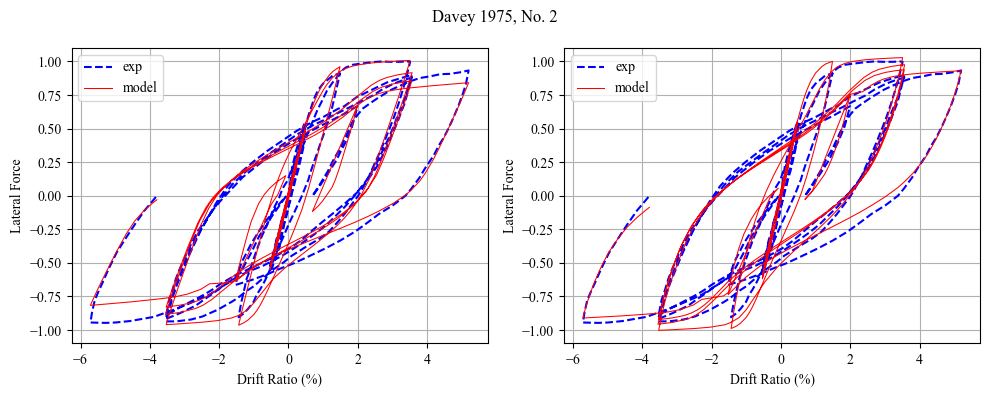



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.7806922449954619, 1.0002665382476497, 0.3094120889391673, 0.5388995411987134, 1.381963426879123, 1.2843316666666666, 0.6803632720994337, 3.3055636660523278, 0.010676249884915731, 5.703820158213967, 0.6765863731715647, 0.006728662373962518, 0.9209208513772424]


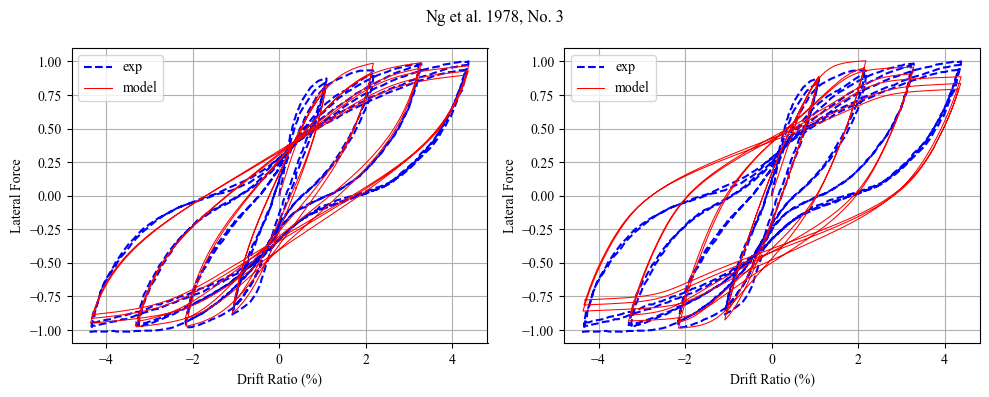



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 2.468899111413208, 1.0002798722372965, 0.451682419843042, 0.5389523888189571, 1.3856794191035222, 1.2843316666666666, 0.682982910470341, 3.4203992217374286, 0.010676250064286583, 4.602822252044015, 0.7056289942921286, 0.005288316049827049, 0.9663030096520442]


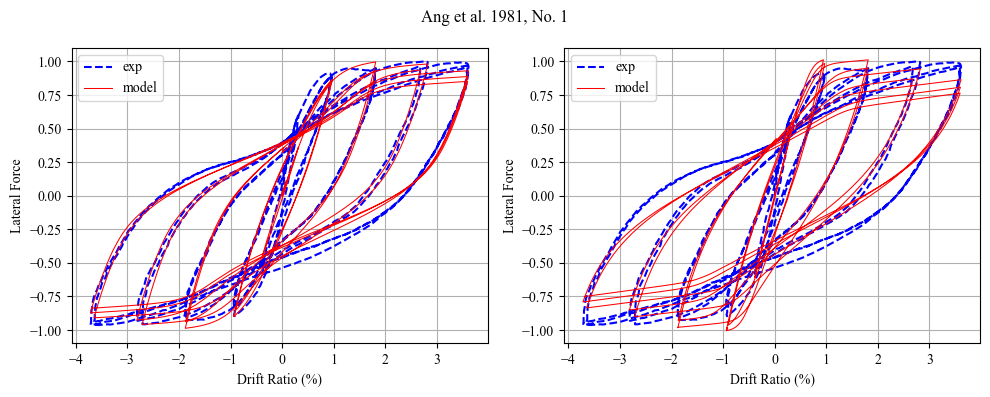



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 2.0012715818436475, 1.0055184984877397, 0.36012712506923766, 0.541589205899606, 1.33320401633986, 1.2843316666666666, 0.6503558230876311, 2.500543083265839, 0.010676249930753504, 4.206712686881411, 0.9539682901909144, 0.005273125158294901, 1.4308570890808578]


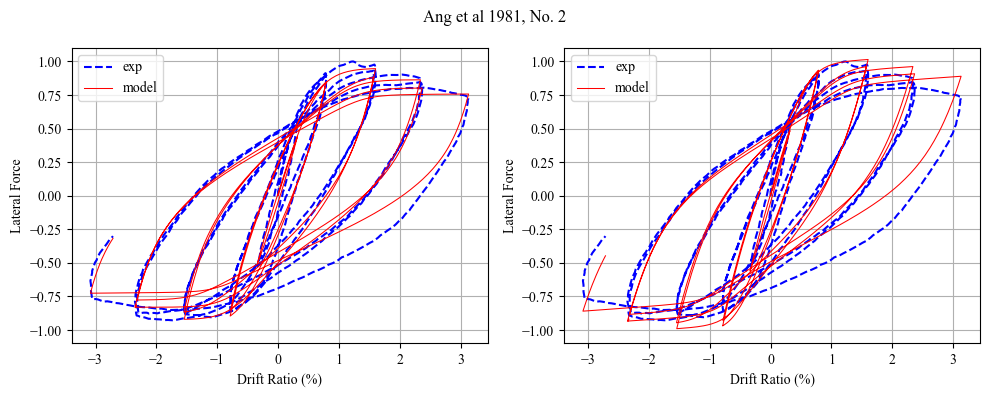



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.8552765340189965, 0.9950372196240198, 0.4914134295281049, 0.5373661401719589, 1.9822821710449472, 1.2843316666666666, 0.6521232671926653, 3.036028423394916, 0.010676250082797744, 4.462716611920037, 0.7105496209996436, 0.005236623872737212, 0.8428708850568025]


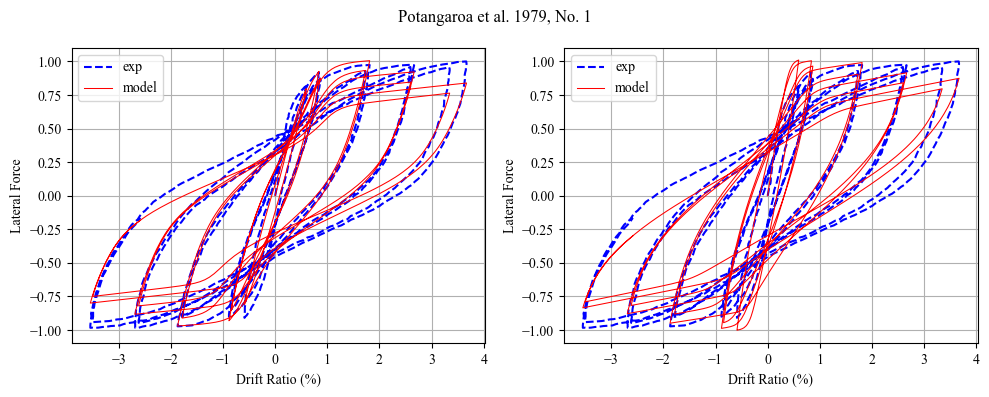



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.218960355162628, 0.988349862879123, 0.4226799385066071, 0.5405741567208558, 1.5287155531400112, 1.2843316666666666, 0.6525533485323889, 3.321088934118859, 0.010676250093222489, 4.704843571997462, 0.7041449505500257, 0.005275579007905291, 1.0413954615017489]


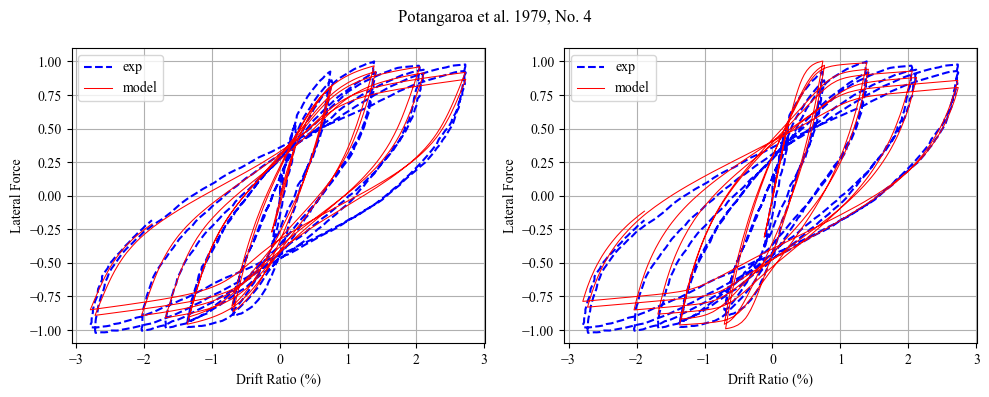



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.1783505298424157, 1.018159927424389, 0.43443733014541214, 0.5427435416666667, 1.3214423825521424, 1.2843316666666666, 0.8451282854214864, 3.2347639723951644, 0.010676249932396515, 4.3100652780153315, 0.8344769686823797, 0.005274416092898896, 0.7843639859586259]


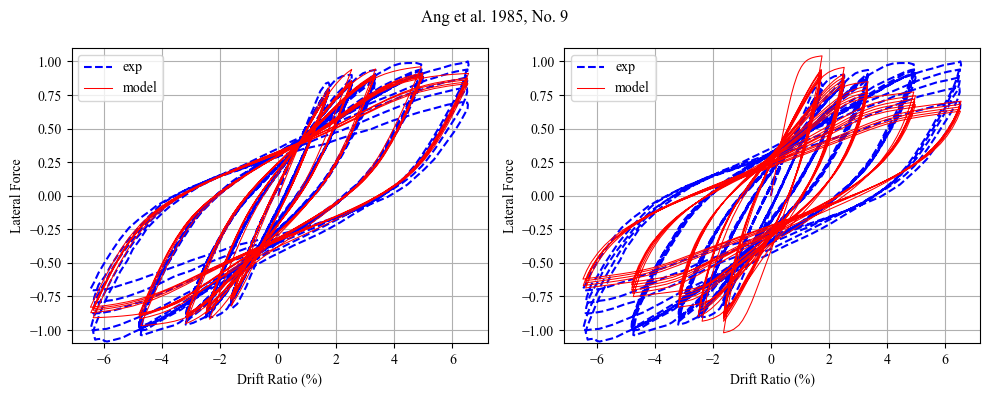



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.103659305407239, 1.0002702083333332, 0.3950766385844236, 0.5427451359540988, 1.5444285464319487, 1.2843316666666666, 0.6829674999999998, 3.4204064583333333, 0.010676249982798341, 5.063614672935768, 0.636206914399207, 0.005843993449888341, 0.9743747916666665]


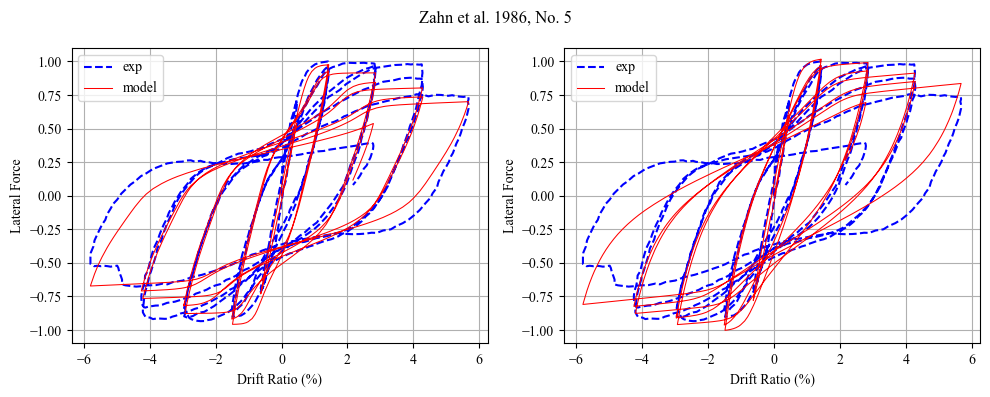



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.5944182429715714, 1.001226139354187, 0.39709203992333036, 0.5263694338615403, 1.313305343006877, 1.2843316666666666, 0.674275001962312, 3.4200493234426563, 0.010676250021767121, 4.71254074578904, 0.7020727083867577, 0.00530818893897363, 1.0966758166943609]


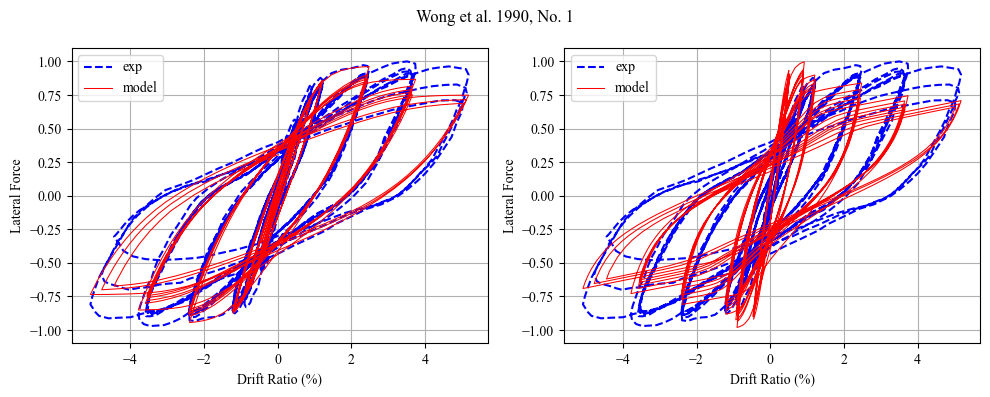



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.9840142351051888, 1.0002600578570489, 0.4590387994297931, 0.5427344132556764, 1.4627531768747817, 1.2843316666666666, 0.7716558726700888, 3.882638845055226, 0.010676249876932725, 5.4278606867213846, 0.6701254749055311, 0.005273125, 1.1775591525989848]


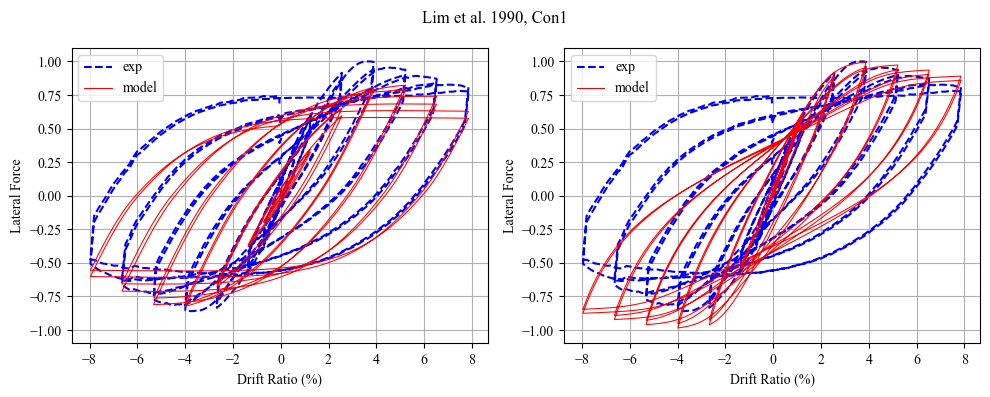



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.3763556250000002, 1.0002660861024515, 0.38444743106339646, 0.5427929522615408, 1.3240088624696793, 1.2843316666666666, 0.6865140035708589, 3.2962666131977314, 0.010676249976571689, 4.742761183398481, 0.7331877772797483, 0.010725282945621525, 1.004012785961908]


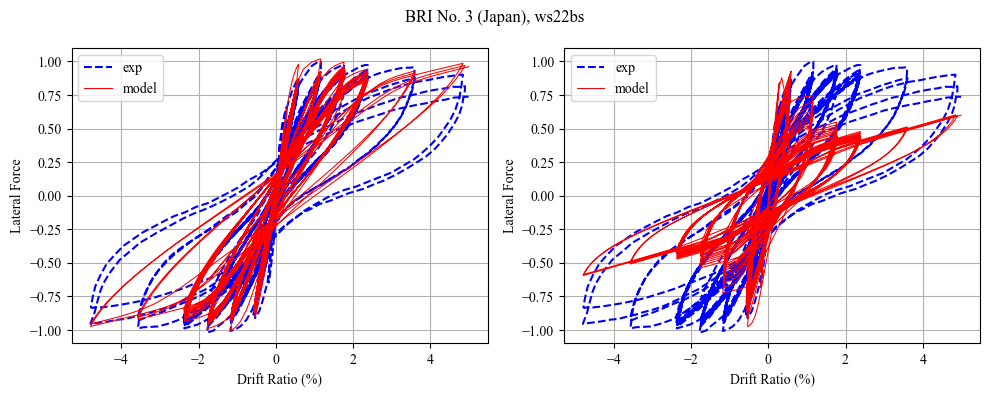



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.9273009945342663, 0.9599401519708421, 0.3107652840765341, 0.700057712708263, 1.7099160394769064, 2.5461010651066145, 0.6790537449450109, 5.171230983856553, 0.010676249873869859, 3.123743167266885, 0.4149076701110476, 0.0009693755003049344, 0.6874462096682229]


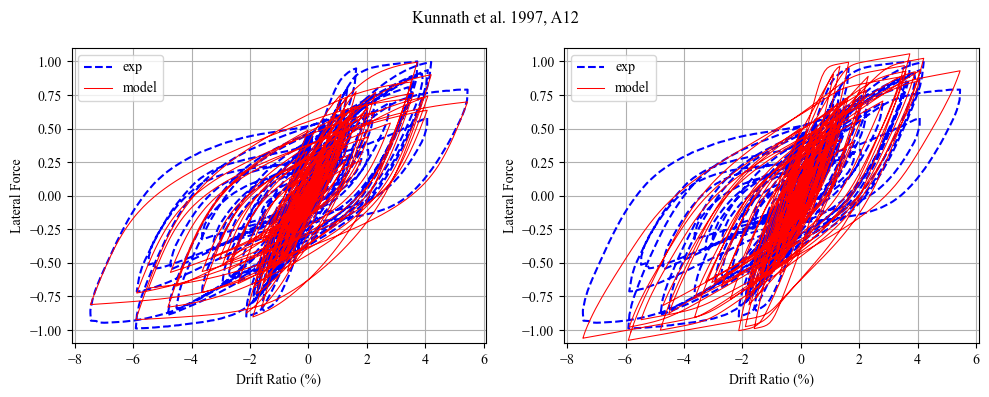



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 2.7934709042554884, 1.0005601655827887, 0.3276872238941496, 0.5427435360640351, 1.5033944189806934, 1.2843316666666666, 0.6403391287091001, 4.942815192184788, 0.010676249991829681, 5.42890938774796, 0.6913507985470256, 0.005273125, 0.6565475293949247]


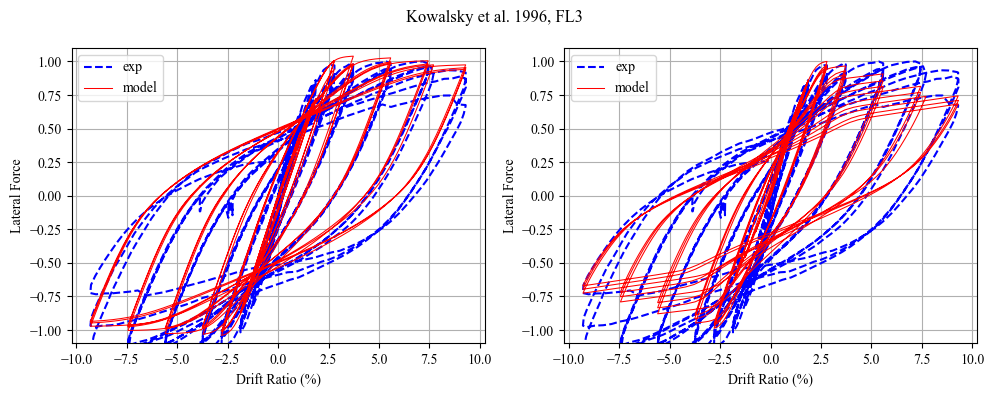



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.2183961150113247, 1.0002702088712898, 0.494204679119307, 0.5427435401540658, 1.4635944668847665, 1.2843316666666666, 0.8429900556721395, 2.675729008935475, 0.01067624987326669, 5.692999053509715, 0.8929691128005817, 0.005273125, 1.01025938030989]


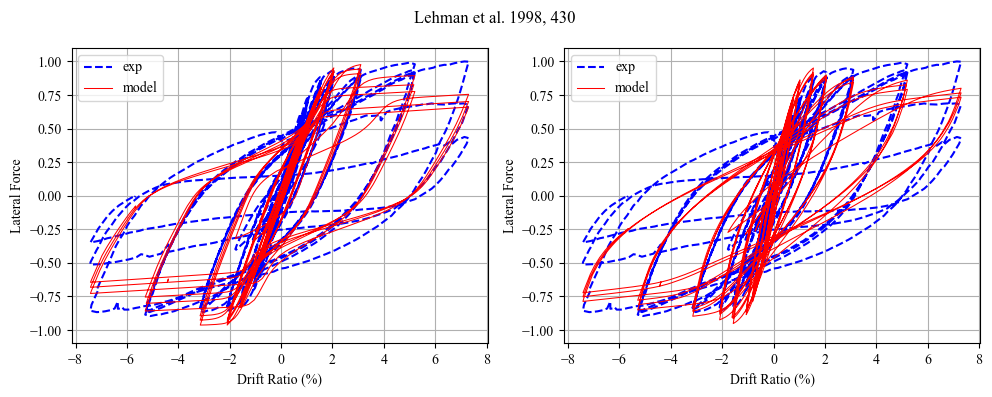



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.7776350586108719, 1.0054860461522968, 0.5884129547733928, 0.23734040867566775, 1.3272739120646004, 1.486342360860869, 0.8065266380106244, 5.6609413086019345, 0.010676249875358309, 5.587899266163192, 0.6303026079098358, 0.01223181231616726, 1.1579064441548652]


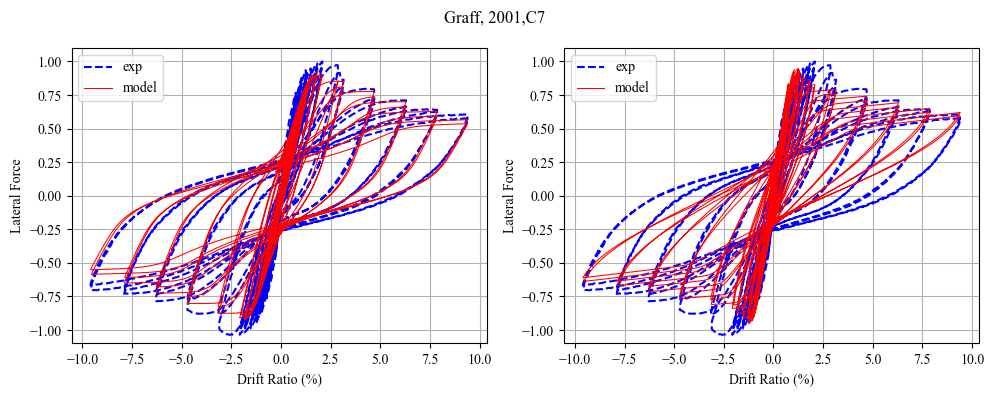



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found


In [4]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
    except:
        print('Name not found')
        continue

    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    try:
        params = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
        gp_predicted = []
            
        for vals in params[0]:
            gp_predicted.append(vals)
        
        # Run the model
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,1)
        run_model(cal_params, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])

        # Now, plot the surrogate predictions
        print(gp_predicted)
        plt.subplot(1,2,2)
        run_model(gp_predicted, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])
        plt.suptitle(test_data['Name'])
        plt.tight_layout()
        plt.show()
        # cc += 1
        print('\n')
    except:
        print('Error')
        continue
    